# GAP Case - Group 2

## Trends fashion 2023 - NLTK analysis

In [1]:
import pandas as pd

trend = pd.read_csv('output_files/vogue_products.csv')

In [2]:
trend.head()

,Product Name
0,The Delphine Nap skirt
1,The Ultrafine Merino ribbed polo
2,leather Horsebit loafer
3,Flip Flap small intrecciato-leather tote bag
4,The Delphine Nap skirt


In [3]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

nltk.download('stopwords')
nltk.download('punkt')

def custom_tokenize(text):
    
    tokens = text.split()
    
    no_dash_tokens = word_tokenize(' '.join([word for word in tokens if '-' not in word]))
    dash_tokens = [word for word in tokens if '-' in word] # Extract words with dashes
    return no_dash_tokens + dash_tokens

trend['tokens'] = trend['Product Name'].apply(lambda x: custom_tokenize(x.lower()))

stop_words = set(stopwords.words('english'))
trend['filtered_tokens'] = trend['tokens'].apply(lambda x: [word for word in x if word not in stop_words])

trend.head()


[nltk_data] Error loading stopwords: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:992)>
[nltk_data] Error loading punkt: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:992)>


,Product Name,tokens,filtered_tokens
0,The Delphine Nap skirt,"[the, delphine, nap, skirt]","[delphine, nap, skirt]"
1,The Ultrafine Merino ribbed polo,"[the, ultrafine, merino, ribbed, polo]","[ultrafine, merino, ribbed, polo]"
2,leather Horsebit loafer,"[leather, horsebit, loafer]","[leather, horsebit, loafer]"
3,Flip Flap small intrecciato-leather tote bag,"[flip, flap, small, tote, bag, intrecciato-lea...","[flip, flap, small, tote, bag, intrecciato-lea..."
4,The Delphine Nap skirt,"[the, delphine, nap, skirt]","[delphine, nap, skirt]"


In [4]:
from collections import Counter

all_tokens = [token for sublist in trend['filtered_tokens'] for token in sublist]
token_counts = Counter(all_tokens)

fabrics = ["cotton", "leather", "silk", "denim", "wool", "linen", "polyester", "lace", "satin", "velvet"]
colors = ["black", "white", "blue", "red", "green", "yellow", "brown", "pink", "orange", "gray", "gold", "silver"]
style = ['midi', 'mini', 'maxi', 'wide-leg', 'fitted', 'loose', 'a-line', 'flared', 'sleeveless', 'long-sleeve', 'short-sleeve', 'maxi-dress', 'straight-leg', 'high-rise']

common_fabrics = [item for item in token_counts.most_common() if item[0] in fabrics]
common_colors = [item for item in token_counts.most_common() if item[0] in colors]
common_styles = [item for item in token_counts.most_common() if item[0] in style]

common_fabrics, common_colors, common_styles[:10]


([('leather', 354),
  ('denim', 120),
  ('linen', 54),
  ('cotton', 52),
  ('wool', 28),
  ('silk', 24),
  ('satin', 19),
  ('velvet', 8),
  ('lace', 4)],
 [('gold', 19),
  ('white', 9),
  ('silver', 7),
  ('black', 3),
  ('yellow', 2),
  ('pink', 2),
  ('red', 2),
  ('brown', 1)],
 [('midi', 168),
  ('maxi', 129),
  ('mini', 96),
  ('wide-leg', 37),
  ('high-rise', 27),
  ('straight-leg', 20),
  ('sleeveless', 8),
  ('long-sleeve', 7),
  ('a-line', 5),
  ('flared', 4)])

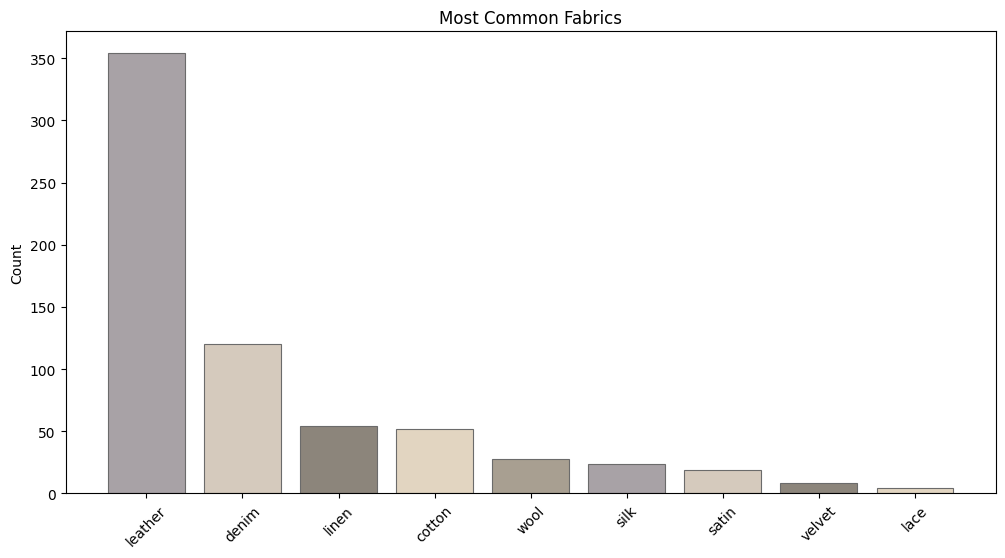

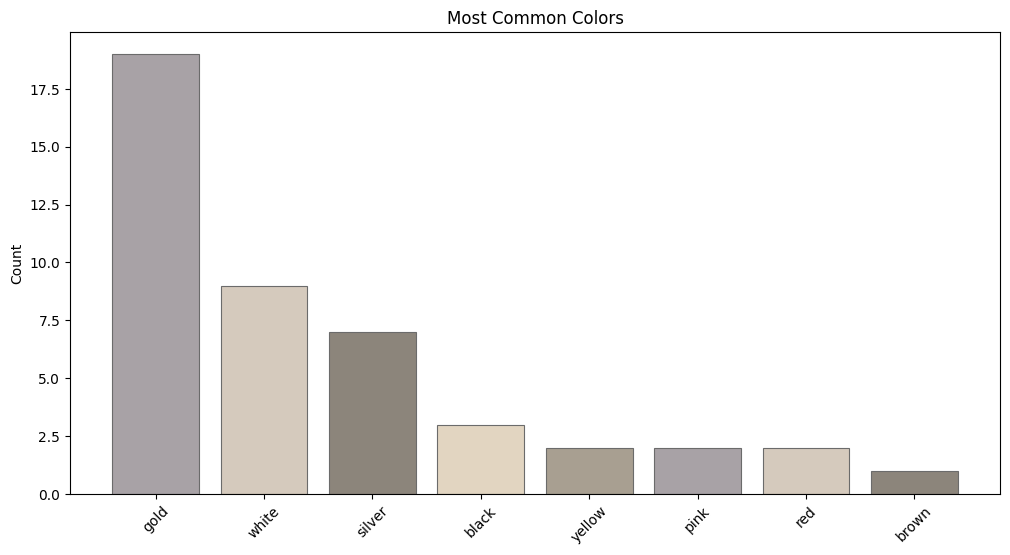

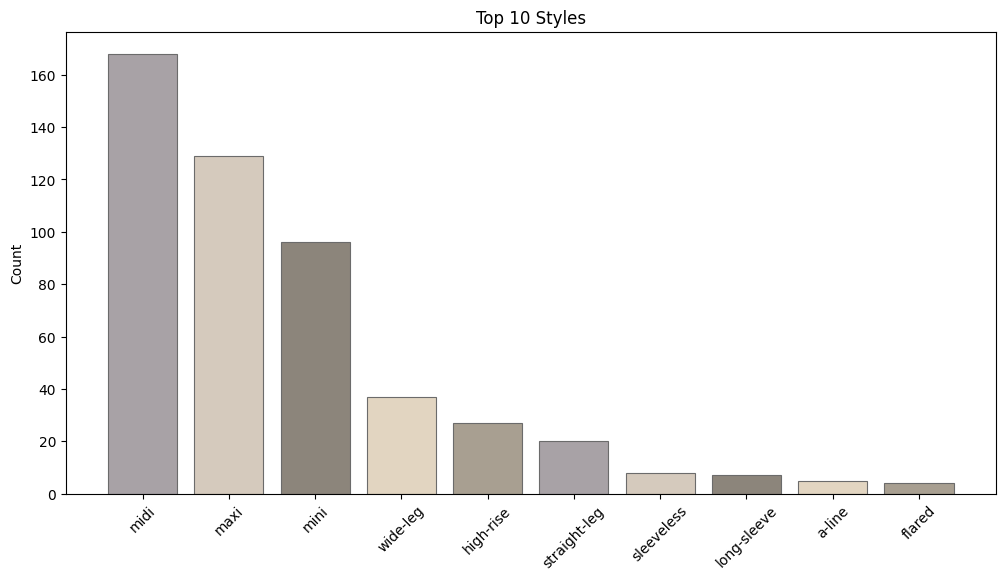

In [5]:
import matplotlib.pyplot as plt

def plot_most_common_custom_colors(items, title, color_palette):
    words = [item[0] for item in items]
    counts = [item[1] for item in items]

    plt.figure(figsize=(12, 6))
    bars = plt.bar(words, counts, color=color_palette[:len(words)])
    plt.title(title)
    plt.xticks(rotation=45)
    plt.ylabel('Count')

    for bar in bars:
        bar.set_edgecolor("#6B6B6B")
        bar.set_linewidth(0.8)
    plt.show()

custom_colors = ['#A8A2A6', '#D5CABD', '#8C857B', '#E2D5C1', '#A89F91']

plot_most_common_custom_colors(common_fabrics, "Most Common Fabrics", custom_colors)
plot_most_common_custom_colors(common_colors, "Most Common Colors", custom_colors)
plot_most_common_custom_colors(common_styles[:10], "Top 10 Styles", custom_colors)


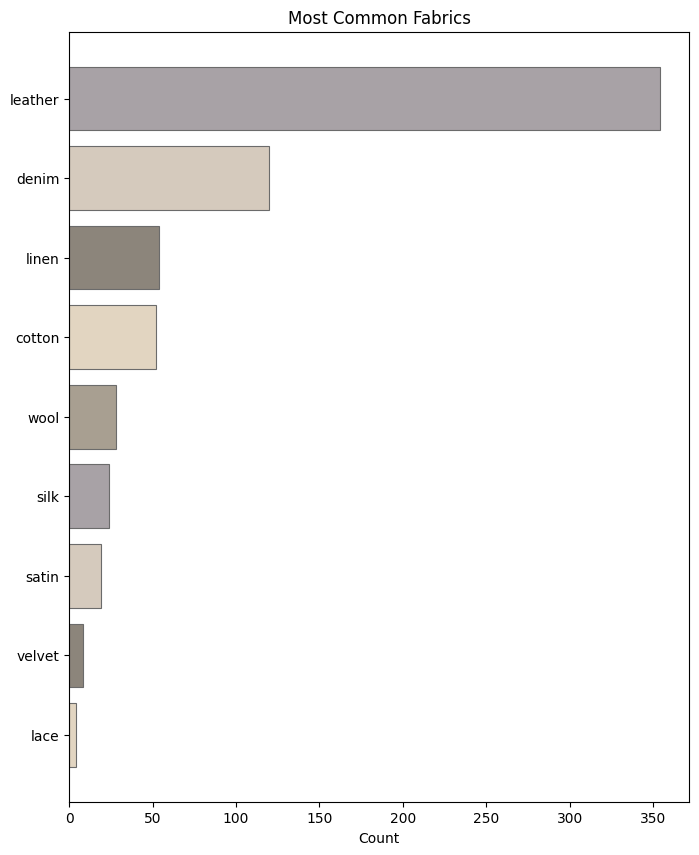

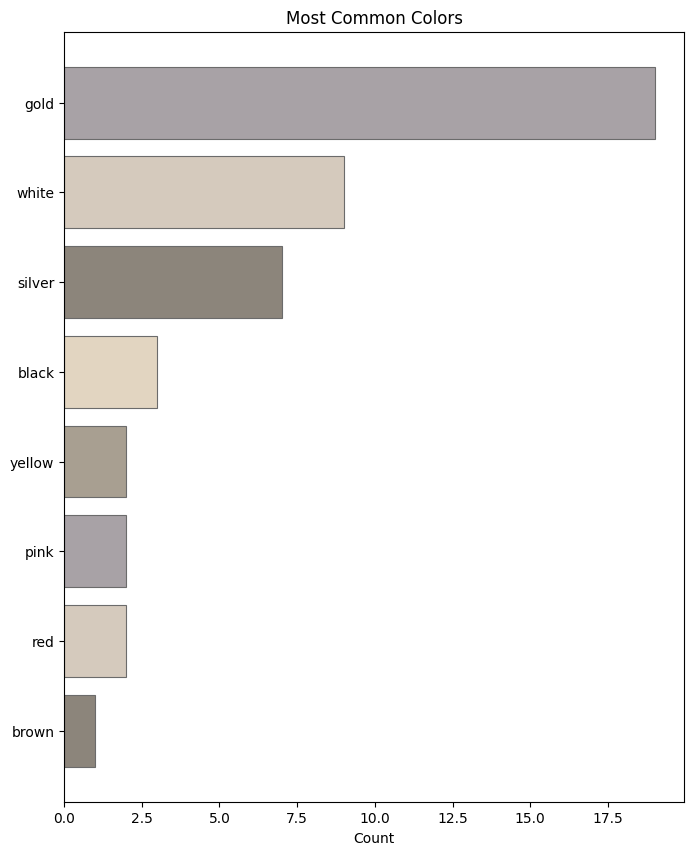

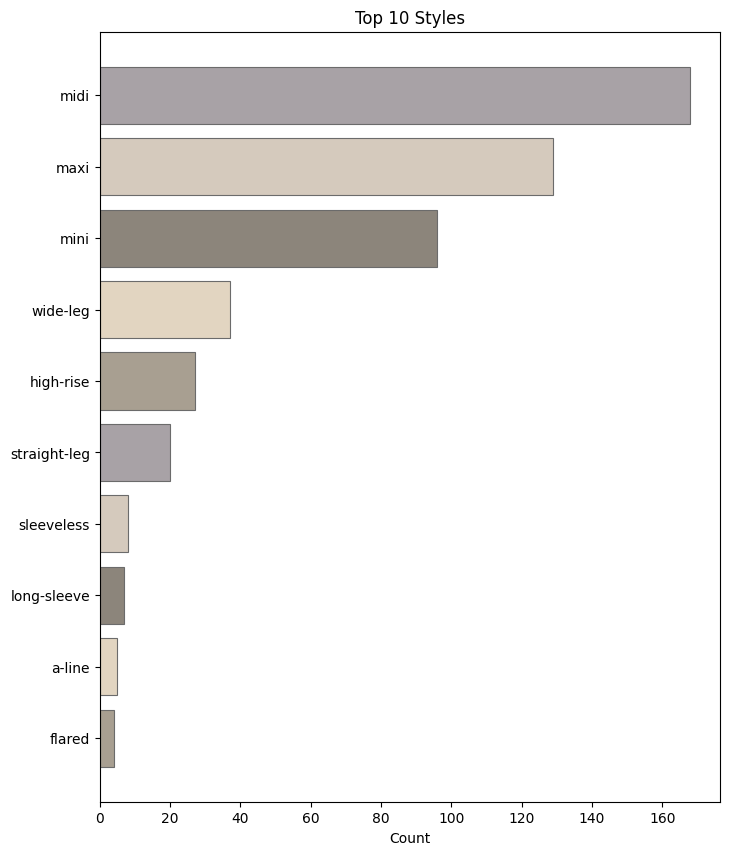

In [6]:
def plot_most_common_vertical(items, title, color_palette):
    words = [item[0] for item in items]
    counts = [item[1] for item in items]

    plt.figure(figsize=(8, 10))
    bars = plt.barh(words, counts, color=color_palette[:len(words)])
    plt.title(title)
    plt.xlabel('Count')
    plt.gca().invert_yaxis() 

    for bar in bars:
        bar.set_edgecolor("#6B6B6B")
        bar.set_linewidth(0.8)
    plt.show()

plot_most_common_vertical(common_fabrics, "Most Common Fabrics", custom_colors)
plot_most_common_vertical(common_colors, "Most Common Colors", custom_colors)
plot_most_common_vertical(common_styles[:10], "Top 10 Styles", custom_colors)
